In [7]:
pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [9]:
class ArtificialImmuneSystem:
    def __init__(self, population_size=10, generations=10):
        self.population_size = population_size
        self.generations = generations
        self.population = []  # This will store our "antibodies"
        self.best_antibody = None
        self.accuracies_over_generations = []  # Track accuracies over generations

    def initialize_population(self):
        """ Initialize a population of antibodies (random classifiers) """
        for _ in range(self.population_size):
            clf = RandomForestClassifier(n_estimators=10)  # Basic classifier as our antibody
            self.population.append(clf)

    def evaluate_population(self, X_train, y_train):
        """ Evaluate the fitness of each antibody (classifier) in the population """
        accuracies = []
        for clf in self.population:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            accuracy = accuracy_score(y_train, y_pred)
            accuracies.append(accuracy)
        return accuracies

    def select_best_antibodies(self, accuracies):
        """ Select the best antibodies based on accuracy """
        sorted_indices = np.argsort(accuracies)[::-1]
        self.population = [self.population[i] for i in sorted_indices[:self.population_size // 2]]

    def clone_and_mutate(self):
        """ Clone the best antibodies and apply mutations to evolve them """
        clones = self.population.copy()
        for clf in clones:
            if random.random() < 0.5:  # Mutation rate
                # Example mutation: change classifier parameters or modify the dataset
                clf.n_estimators = random.choice([10, 50, 100])
        self.population.extend(clones)

    def train(self, X_train, y_train):
        self.initialize_population()
        for generation in range(self.generations):
            accuracies = self.evaluate_population(X_train, y_train)
            self.select_best_antibodies(accuracies)
            self.clone_and_mutate()
            self.accuracies_over_generations.append(np.max(accuracies))  # Track max accuracy of this generation

        # Train the best classifier in the population
        self.best_antibody = self.population[0]

    def predict(self, X_test):
        """ Predict using the best antibody """
        return self.best_antibody.predict(X_test)

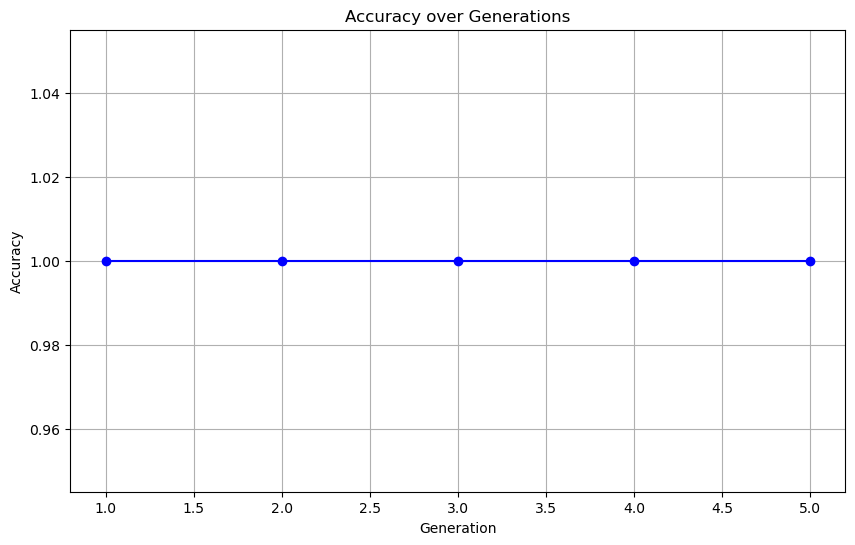

In [10]:
# Create and train the AIS model
ais = ArtificialImmuneSystem(population_size=20, generations=5)
ais.train(X_train, y_train)

# Plot the accuracy over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, ais.generations + 1), ais.accuracies_over_generations, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Generations')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

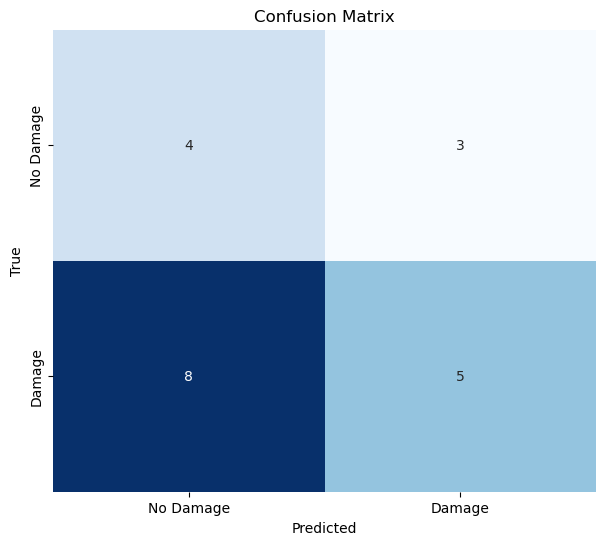

In [11]:
# Predict on the test data
y_pred = ais.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Damage", "Damage"], yticklabels=["No Damage", "Damage"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

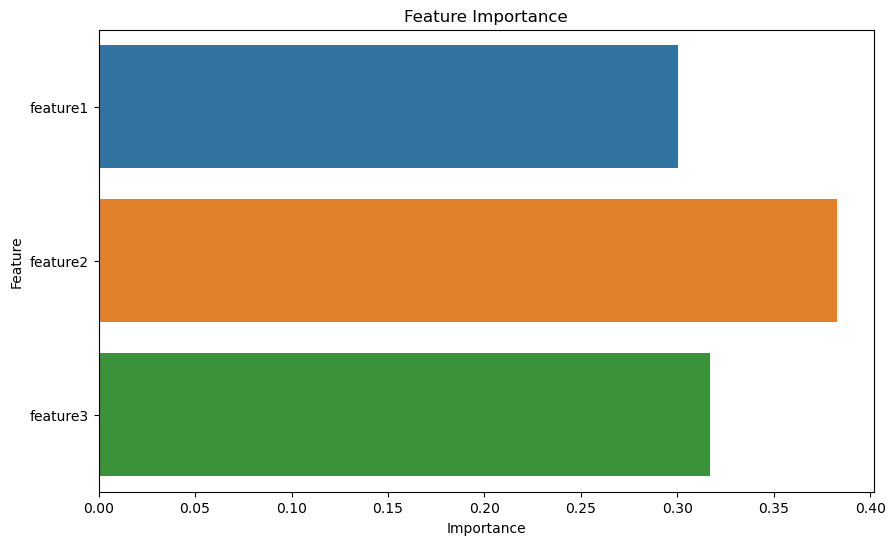

In [12]:
# Get feature importance from the best antibody (RandomForestClassifier)
importances = ais.best_antibody.feature_importances_
features = X.columns  # Assuming your data is a DataFrame and has column names

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

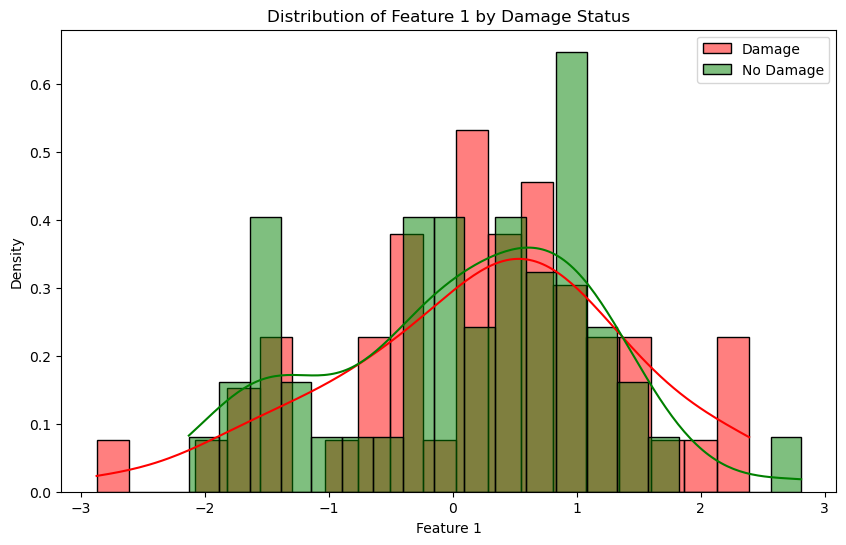

In [13]:
# Plot the distribution of a feature (e.g., 'feature1') for both classes (Damage/No Damage)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 1]['feature1'], color='r', label='Damage', kde=True, stat='density', bins=20)
sns.histplot(df[df['target'] == 0]['feature1'], color='g', label='No Damage', kde=True, stat='density', bins=20)
plt.title('Distribution of Feature 1 by Damage Status')
plt.xlabel('Feature 1')
plt.ylabel('Density')
plt.legend()
plt.show()

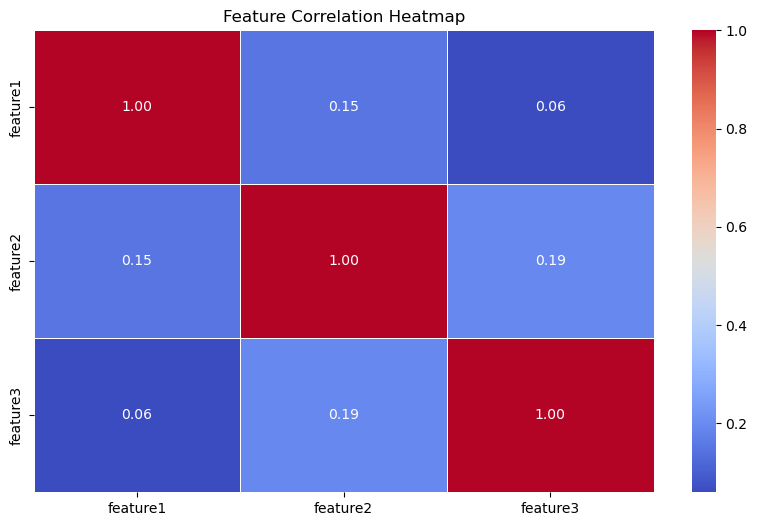

In [14]:
# Compute correlation matrix
corr_matrix = df.drop(columns='target').corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()